In [26]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [27]:
gold_data = pd.read_csv('gld_price_data.csv')

In [28]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [29]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [30]:
gold_data.shape

(2290, 6)

In [31]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [32]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [33]:

gold_data=gold_data.drop(['Date'],axis=1)

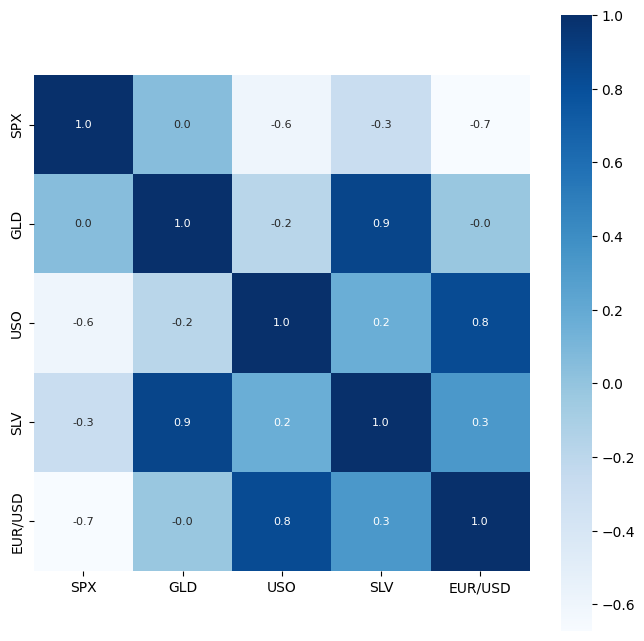

In [34]:


correlation = gold_data.corr()


plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size": 8}, cmap="Blues")
plt.show()


In [35]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


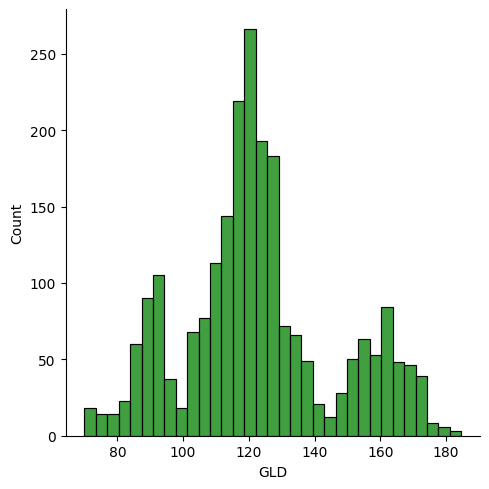

In [36]:
sns.displot(gold_data['GLD'],color='green')

In [37]:
X=gold_data.drop(['GLD'],axis=1)
Y=gold_data['GLD']

In [38]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [39]:
regressor=RandomForestRegressor(n_estimators=100)

In [40]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [41]:
test_data_prediction= regressor.predict(X_test)

In [42]:
test_data_prediction


array([168.66779954,  81.97849989, 115.98430022, 127.79010059,
       120.66750105, 154.77239802, 149.89209838, 125.98600041,
       117.48369859, 125.9245006 , 116.49320111, 171.88580093,
       141.28109867, 167.75189863, 115.29339982, 117.46550043,
       138.59120316, 170.24990104, 159.24760248, 161.09879891,
       155.0663003 , 125.45440011, 176.12330012, 158.1955034 ,
       125.23590045,  93.80309977,  77.58470024, 120.4595002 ,
       119.06119889, 167.40780015,  88.07900019, 125.20500006,
        91.35300075, 117.64090043, 121.11589948, 136.12190099,
       115.57630133, 115.51260097, 148.32519942, 107.30670073,
       104.22510251,  87.09899786, 126.44180056, 117.77209999,
       152.33009905, 119.7864    , 108.45569947, 108.01069814,
        93.31810108, 126.98599811,  75.20750045, 113.62449917,
       121.42790015, 111.42109906, 118.81199882, 120.99689951,
       159.45859979, 166.88600173, 147.16599698,  85.92499858,
        94.29300045,  86.7871991 ,  90.58740008, 118.84

In [43]:
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [44]:
error_score

0.9892867197212716

In [48]:
Y_test=list(Y_test)

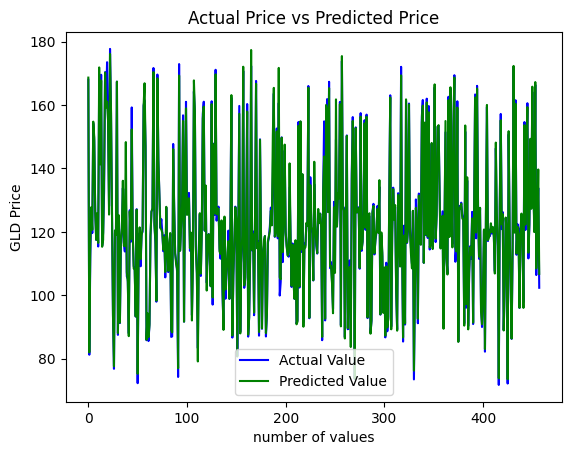

In [49]:
plt.plot(Y_test, color='blue', label= 'Actual Value')
plt.plot(test_data_prediction, color='green' , label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel( 'number of values' )
plt.ylabel( 'GLD Price')
plt.legend()
plt.show()